# Austins Analysis

In my portion of the analysis, I will be doing logistic regression to try and predict survival of passengers efficiently.

In [1]:
import pandas as pd

titanic = pd.read_csv("titanic_augmented.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_deck,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,7.250,3.034483,Unknown,NaN,92490,221958,6.134152,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,71.283,0.533084,C,85.0,15655423,771155,4.182430,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,7.925,3.280757,Unknown,NaN,90218500,231932,9.327285,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,2,26.550,0.659134,C,123.0,2493079,465838,8.660639,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,1,8.050,4.347826,Unknown,NaN,59517148,359178,0.452187,4


## Data Wrangling for Logistic Regression

In [2]:
# Check basic info and missing values
print("Dataset shape:", titanic.shape)
print("\nColumn data types:")
print(titanic.dtypes)
print("\nMissing values:")
print(titanic.isnull().sum())
print("\nBasic statistics:")
titanic.describe()

Dataset shape: (891, 26)

Column data types:
PassengerId            int64
Survived               int64
Pclass                 int64
Name                  object
Sex                   object
Age                  float64
SibSp                  int64
Parch                  int64
Ticket                object
Fare                 float64
Cabin                 object
Embarked              object
name_length            int64
title                 object
title_group           object
family_size            int64
is_alone               int64
ticket_group_size      int64
fare_per_person      float64
age_fare_ratio       float64
cabin_deck            object
cabin_room_number    float64
booking_reference      int64
service_id             int64
cabin_score          float64
name_word_count        int64
dtype: object

Missing values:
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp               

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,name_length,family_size,is_alone,ticket_group_size,fare_per_person,age_fare_ratio,cabin_room_number,booking_reference,service_id,cabin_score,name_word_count
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,200.00000,8.910000e+02,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,26.965208,1.904602,0.602694,1.787879,17.789001,1.572536,50.49000,5.108118e+07,536369.988777,4.956762,4.067340
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,9.281607,1.613459,0.489615,1.361142,21.218127,1.661773,35.39497,2.838174e+07,261551.630299,2.915177,1.168866
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,9.249000e+04,102869.000000,0.046320,3.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,20.000000,1.000000,0.000000,1.000000,7.762500,0.116026,22.00000,2.831962e+07,299638.000000,2.325861,3.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,25.000000,1.000000,1.000000,1.000000,8.850000,1.175795,43.00000,5.128853e+07,535564.000000,4.954913,4.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,30.000000,2.000000,1.000000,2.000000,24.288000,2.543045,77.25000,7.493131e+07,757663.000000,7.479345,4.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,82.000000,11.000000,1.000000,7.000000,221.779000,9.779559,148.00000,9.997588e+07,999684.000000,9.997177,14.000000


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a copy for wrangling
df = titanic.copy()

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Remove Cabin columns as there are too many unknowns and it may not add significant value
df.drop(columns=['Cabin', 'cabin_room_number', 'title'], inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
name_length          0
title_group          0
family_size          0
is_alone             0
ticket_group_size    0
fare_per_person      0
age_fare_ratio       0
cabin_deck           0
booking_reference    0
service_id           0
cabin_score          0
name_word_count      0
dtype: int64


C:\Users\austi\AppData\Local\Temp\ipykernel_10516\4112954337.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\austi\AppData\Local\Temp\ipykernel_10516\4112954337.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [6]:
# Encode categorical variables
# Create binary encoding for Sex
df['Sex_binary'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
df_encoded = pd.get_dummies(df, columns=['Embarked'], prefix='embarked', drop_first=True)

# One-hot encode Pclass 
df_encoded = pd.get_dummies(df_encoded, columns=['Pclass'], prefix='class', drop_first=True)

# One-hot encode title_group if you want to use it
df_encoded = pd.get_dummies(df_encoded, columns=['title_group'], prefix='title', drop_first=True)

df_encoded = pd.get_dummies(df_encoded, columns=['cabin_deck'], prefix='cabin', drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("\nNew columns:", [col for col in df_encoded.columns if col not in titanic.columns])

Shape after encoding: (891, 36)

New columns: ['Sex_binary', 'embarked_Q', 'embarked_S', 'class_2', 'class_3', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Other', 'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_T', 'cabin_Unknown']


In [7]:
# Select features for logistic regression
# Choose relevant numerical and encoded categorical features
feature_columns = [
    'Age', 'SibSp', 'Parch', 'Fare', 'Sex_binary', 
    'family_size', 'is_alone', 'fare_per_person',
    'name_length', 'ticket_group_size', 'fare_per_person',
    'age_fare_ratio', 'cabin_deck', 'cabin_score', 
    'booking_reference', 'service_id', 
    'class_2', 'class_3','embarked_Q', 'embarked_S'
]

# Add title columns if they exist
title_cols = [col for col in df_encoded.columns if col.startswith('Title_')]
feature_columns.extend(title_cols)

# Add cabin_deck columns if they exist
cabin_deck_cols = [col for col in df_encoded.columns if col.startswith('cabin_')]
feature_columns.extend(cabin_deck_cols)

# Filter to only include columns that exist in the dataframe
feature_columns = [col for col in feature_columns if col in df_encoded.columns]

X = df_encoded[feature_columns]
y = df_encoded['Survived']

print("Features selected:", len(feature_columns))
print("Feature names:", feature_columns)
print("\nX shape:", X.shape)
print("y shape:", y.shape)

Features selected: 28
Feature names: ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_binary', 'family_size', 'is_alone', 'fare_per_person', 'name_length', 'ticket_group_size', 'fare_per_person', 'age_fare_ratio', 'cabin_score', 'booking_reference', 'service_id', 'class_2', 'class_3', 'embarked_Q', 'embarked_S', 'cabin_score', 'cabin_B', 'cabin_C', 'cabin_D', 'cabin_E', 'cabin_F', 'cabin_G', 'cabin_T', 'cabin_Unknown']

X shape: (891, 28)
y shape: (891,)


In [8]:
# Check for any remaining missing values in features
print("Missing values in X:")
print(X.isnull().sum().sum())

# Check for infinite values
print("\nInfinite values in X:")
print(np.isinf(X.select_dtypes(include=[np.number])).sum().sum())

# Display first few rows
X.head()

Missing values in X:
0

Infinite values in X:
0


,Age,SibSp,Parch,Fare,Sex_binary,family_size,is_alone,fare_per_person,name_length,ticket_group_size,...,embarked_S,cabin_score,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_Unknown
0,22.0,1,0,7.2500,0,2,0,7.250,23,1,...,True,6.134152,False,False,False,False,False,False,False,True
1,38.0,1,0,71.2833,1,2,0,71.283,51,1,...,False,4.182430,False,True,False,False,False,False,False,False
2,26.0,0,0,7.9250,1,1,1,7.925,22,1,...,True,9.327285,False,False,False,False,False,False,False,True
3,35.0,1,0,53.1000,1,2,0,26.550,44,2,...,True,8.660639,False,True,False,False,False,False,False,False
4,35.0,0,0,8.0500,0,1,1,8.050,24,1,...,True,0.452187,False,False,False,False,False,False,False,True


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set size: (712, 28)
Testing set size: (179, 28)

Class distribution in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


In [10]:
# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Data is now ready for logistic regression!")
print("\nScaled training data shape:", X_train_scaled.shape)
print("Scaled testing data shape:", X_test_scaled.shape)

Data is now ready for logistic regression!

Scaled training data shape: (712, 28)
Scaled testing data shape: (179, 28)


## Logistic Regression Analysis

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

Model trained successfully!


In [ ]:
# Make predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

# Get prediction probabilities for ROC curve
y_train_proba = log_reg.predict_proba(X_train_scaled)[:, 1]
y_test_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

Predictions completed!


In [13]:
# Evaluate model performance
print("=" * 50)
print("TRAINING SET PERFORMANCE")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_train, y_train_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))

print("\n" + "=" * 50)
print("TEST SET PERFORMANCE")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_test_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

TRAINING SET PERFORMANCE
Accuracy: 0.8174
ROC-AUC Score: 0.8774

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       439
           1       0.78      0.73      0.75       273

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712


TEST SET PERFORMANCE
Accuracy: 0.7933
ROC-AUC Score: 0.8497

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



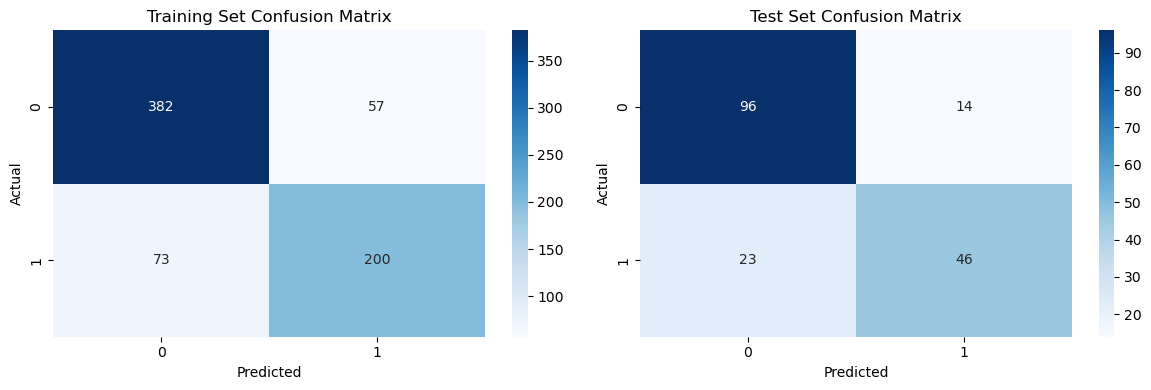

In [14]:
# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Training Set Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

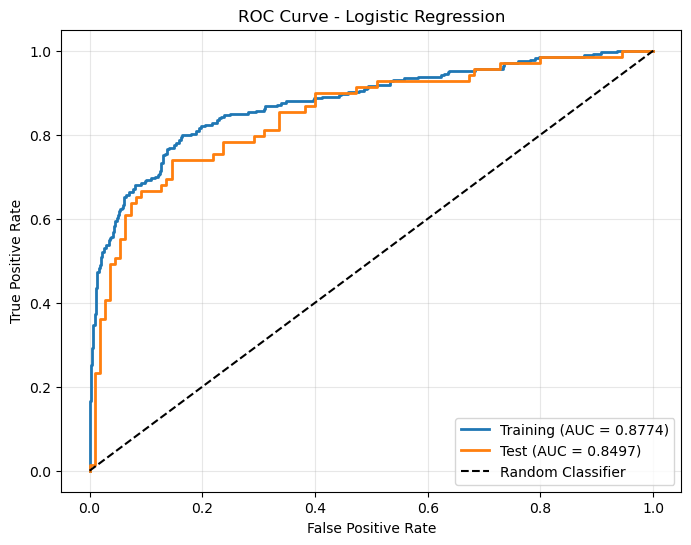

In [15]:
# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training (AUC = {roc_auc_score(y_train, y_train_proba):.4f})', linewidth=2)
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_score(y_test, y_test_proba):.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Top 15 Most Important Features:
            Feature  Coefficient
4        Sex_binary     1.183210
16          class_3    -0.620965
0               Age    -0.569456
3              Fare     0.434772
27    cabin_Unknown    -0.380059
8       name_length     0.311695
1             SibSp    -0.299124
18       embarked_S    -0.248764
5       family_size    -0.247122
23          cabin_E     0.238669
6          is_alone    -0.198474
22          cabin_D     0.167165
26          cabin_T    -0.156039
25          cabin_G    -0.154310
7   fare_per_person    -0.147386


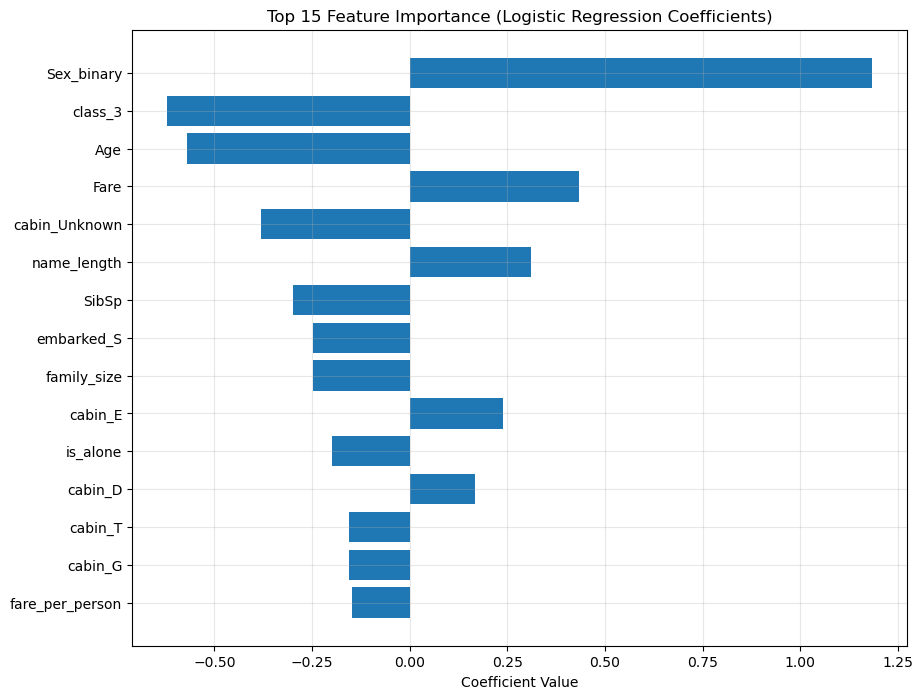

In [16]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Coefficient'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Feature Importance (Logistic Regression Coefficients)')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.show()